In [1]:
# https://www.tensorflow.org/tutorials/keras/classification
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.6.0


In [2]:
# https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


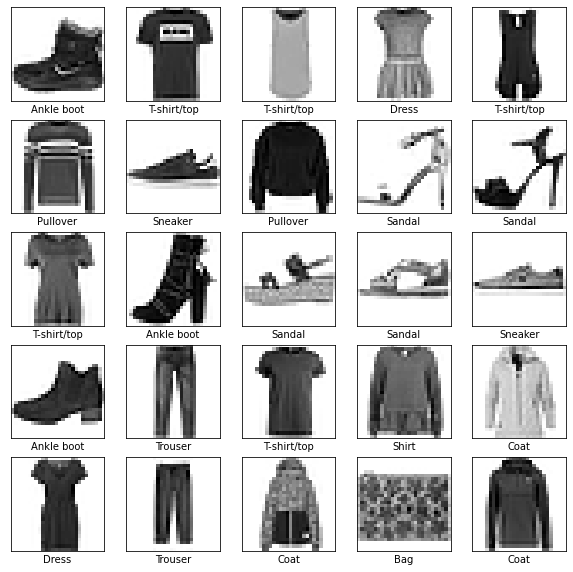

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [5]:
# re-scale the image data to values between (0.0,1.0]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [6]:
# Add a channels dimension
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
X_train.shape

(60000, 28, 28, 1)

In [7]:
y_train = y_train.reshape(-1,1)
y_train.shape

(60000, 1)

In [8]:
from sklearn.preprocessing import OneHotEncoder
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_train)
y.shape

(60000, 10)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                27050     
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 36s 4ms/step - loss: 0.7226 - accuracy: 0.7517 - val_loss: 0.6643 - val_accuracy: 0.7367
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5129 - accuracy: 0.8176 - val_loss: 0.4880 - val_accuracy: 0.8284
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4674 - accuracy: 0.8356 - val_loss: 0.4885 - val_accuracy: 0.8240


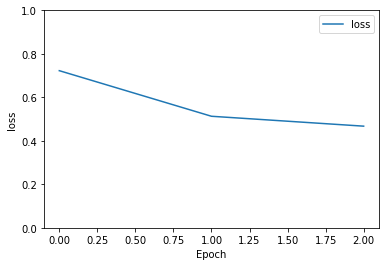

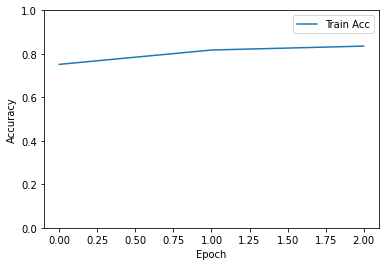

In [13]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [14]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(scores[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.4885 - accuracy: 0.8240
Accuracy: 0.8240000009536743


In [15]:
predictions = model.predict(X_test)
print(predictions.shape)


(10000, 10)


In [16]:
pred = np.argmax(predictions, axis=1)
pred.shape

(10000,)

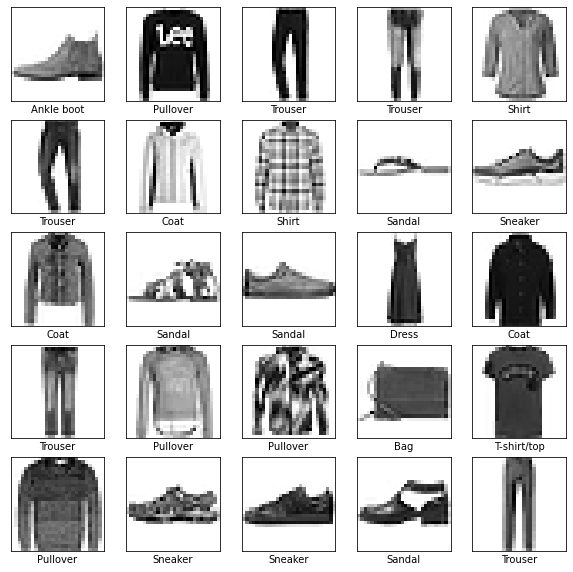

In [17]:
plt.figure(figsize=(10,10))
X_test = X_test.reshape(-1, 28, 28)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred[i]])
plt.show()
